In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Preprocessing 

### Feature reduction

In [3]:
# Remove education column
data = data.drop('education', 1)

### Fill missing values

In [4]:
data.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
#Remove heart rate null
data = data[data['heartRate'].notnull()]

#fill cigs per day with mean
cig_user = data['currentSmoker'].value_counts()
cig_tot = data['cigsPerDay'].sum()
cig_mean = cig_tot / cig_user[1]
cig_mean = round(cig_mean)
data['cigsPerDay'].fillna(cig_mean, inplace = True)

#fill BP meds with mean
bp_mean = data['BPMeds'].mean()
data['BPMeds'].fillna(bp_mean, inplace = True)

#fill total cholesterol with mean
chol_mean = data['totChol'].mean()
data['totChol'].fillna(chol_mean, inplace = True)

#fill BMI with mean
bmi_mean = data['BMI'].mean()
data['BMI'].fillna(bmi_mean, inplace = True)

#fill glucose with mean
glu_mean = data['glucose'].mean()
data['glucose'].fillna(glu_mean, inplace = True)

In [6]:
data.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## EDA

<AxesSubplot:>

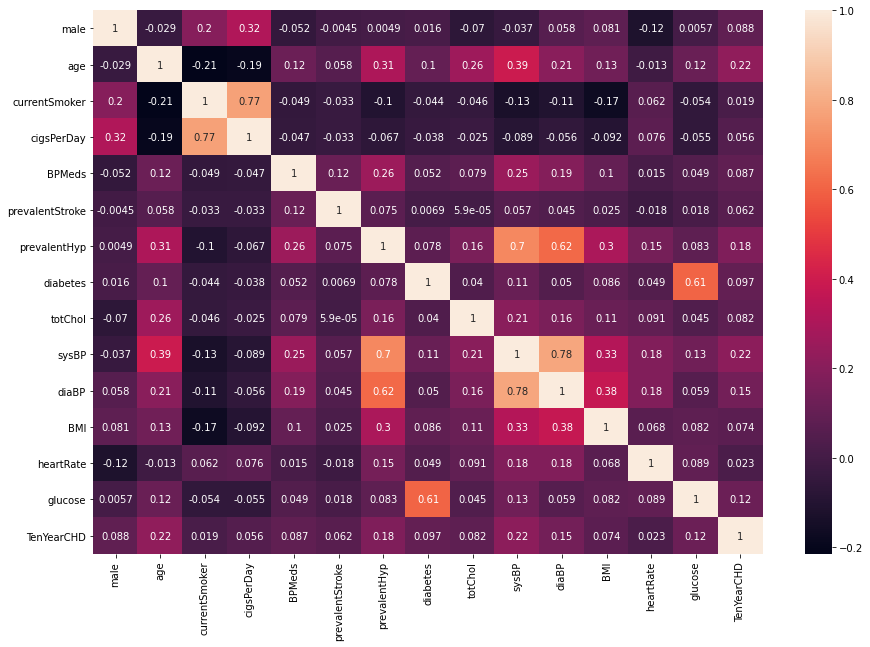

In [7]:
correlation = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlation, annot = True)

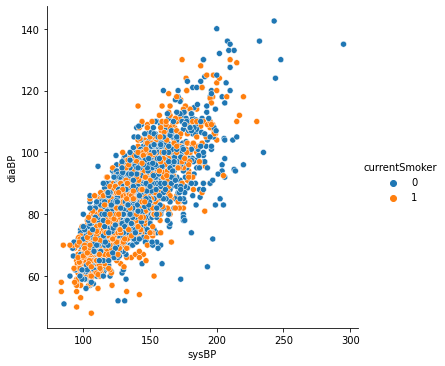

In [8]:
#scatter plot
sns.relplot(x = 'sysBP', y = 'diaBP', data=data, hue = 'currentSmoker')

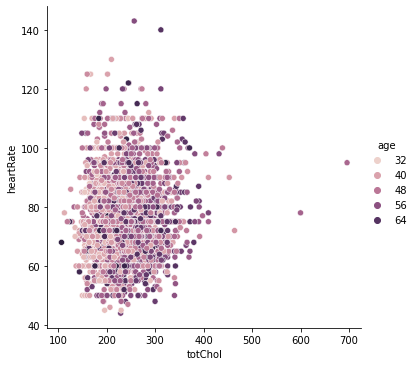

In [9]:
sns.relplot(x = 'totChol', y = 'heartRate', data=data, hue = 'age')

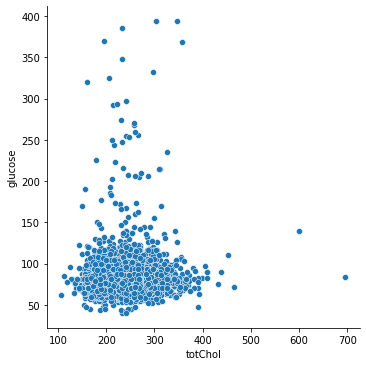

In [10]:
sns.relplot(x = 'totChol', y = 'glucose', data=data)

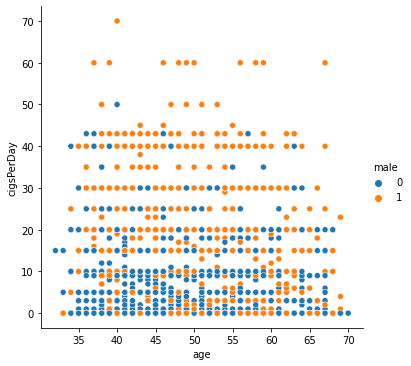

In [11]:
sns.relplot(x = 'age', y = 'cigsPerDay', data=data, hue= 'male')

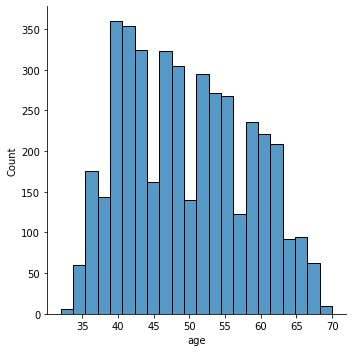

In [12]:
sns.displot(data['age'])

<AxesSubplot:xlabel='BMI', ylabel='Density'>

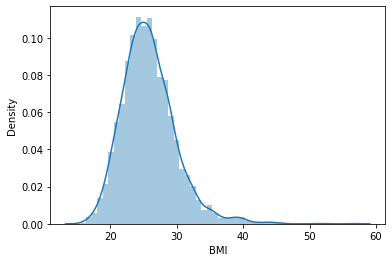

In [13]:
sns.distplot(data['BMI'])

## Modelling

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [15]:
#Feature and Target
x = data.drop(['TenYearCHD'], axis = 1)
y = data['TenYearCHD']

In [16]:
#split to train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = 0.25)
x_train.shape, y_train.shape

((3177, 14), (3177,))

In [17]:
x_test.shape, y_test.shape

((1060, 14), (1060,))

In [18]:
clsf = RandomForestClassifier()
clsf.fit(x_train, y_train)
y_prep = clsf.predict(x_test)

In [19]:
print("Accuracy : ", accuracy_score(y_test,y_prep))
print("Precision : ", precision_score(y_test,y_prep))
print("Recall : ", recall_score(y_test,y_prep))
print("F1 score : ", f1_score(y_test,y_prep))
confusion_matrix(y_test,y_prep)

Accuracy :  0.8349056603773585
Precision :  0.3125
Recall :  0.029585798816568046
F1 score :  0.05405405405405405


array([[880,  11],
       [164,   5]])

### KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
acc_val = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_val.append(acc)

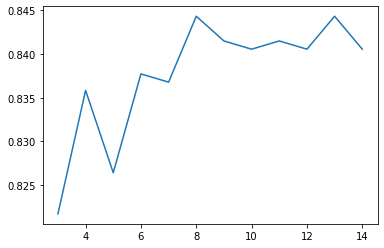

In [22]:
plt.plot(neighbors,acc_val)

In [23]:
classifier = KNeighborsClassifier(n_neighbors= 8, metric = 'minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [24]:
print("Accuracy : ", accuracy_score(y_test,y_prep))
print("Precision : ", precision_score(y_test,y_prep))
print("Recall : ", recall_score(y_test,y_prep))
print("F1 score : ", f1_score(y_test,y_prep))
confusion_matrix(y_test,y_prep)

Accuracy :  0.8349056603773585
Precision :  0.3125
Recall :  0.029585798816568046
F1 score :  0.05405405405405405


array([[880,  11],
       [164,   5]])

### Standerd Scaling

In [25]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

In [26]:
clsf.fit(x_train, y_train)
y_prep = clsf.predict(x_test)

In [27]:
print("Accuracy : ", accuracy_score(y_test,y_prep))
print("Precision : ", precision_score(y_test,y_prep))
print("Recall : ", recall_score(y_test,y_prep))
print("F1 score : ", f1_score(y_test,y_prep))
confusion_matrix(y_test,y_prep)

Accuracy :  0.8367924528301887
Precision :  0.4
Recall :  0.047337278106508875
F1 score :  0.08465608465608465


array([[879,  12],
       [161,   8]])

In [28]:
acc_val = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_val.append(acc)

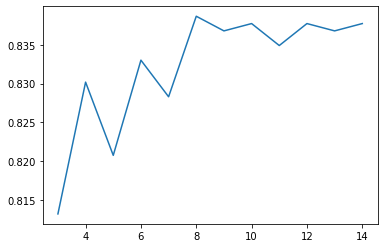

In [29]:
plt.plot(neighbors,acc_val)

In [30]:
classifier = KNeighborsClassifier(n_neighbors= 8, metric = 'minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [31]:
print("Accuracy : ", accuracy_score(y_test,y_prep))
print("Precision : ", precision_score(y_test,y_prep))
print("Recall : ", recall_score(y_test,y_prep))
print("F1 score : ", f1_score(y_test,y_prep))
confusion_matrix(y_test,y_prep)

Accuracy :  0.8367924528301887
Precision :  0.4
Recall :  0.047337278106508875
F1 score :  0.08465608465608465


array([[879,  12],
       [161,   8]])